In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,6

In [2]:
df = pd.read_csv('SeriesTemporais_Python/Download/Dados/all-stocks-2006-01-01-to-2018-01-01.csv',parse_dates=['Date'])

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [4]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

In [5]:
rng = pd.date_range(start='2006-01-01', end='2018-01-01',freq='B')
rng[~rng.isin(df.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [6]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01',freq='B')
year_end_dates = sample_dates[sample_dates.is_year_end]
year_end_dates

DatetimeIndex(['2006-12-29', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29'],
              dtype='datetime64[ns]', freq=None)

In [7]:
worst_stocks = df[df.Date == df.Date.max()].sort_values('Open').head()
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [8]:
ws = worst_stocks.Name.values
ws

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [9]:
tdf = df. copy()
tdf = df.set_index('Date')

Name
CSCO    AxesSubplot(0.125,0.2;0.775x0.68)
GE      AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
KO      AxesSubplot(0.125,0.2;0.775x0.68)
PFE     AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

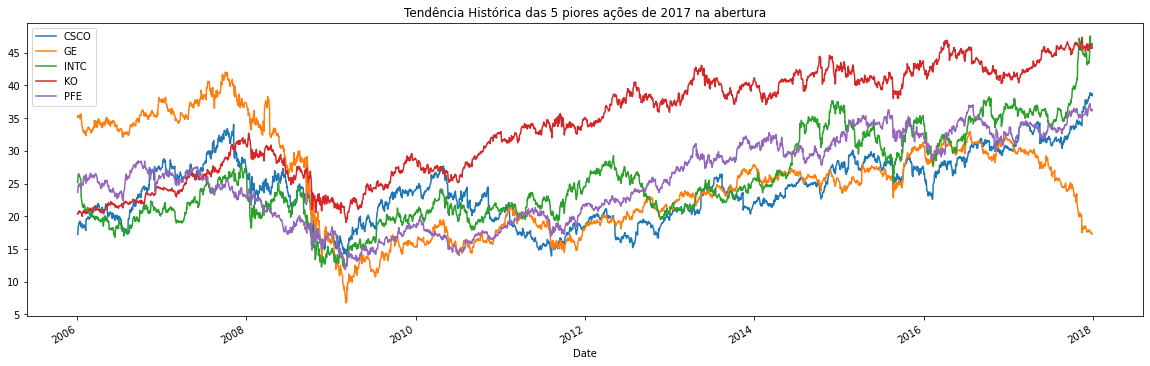

In [10]:
tdf[tdf.Name.isin(ws)].groupby('Name').Open.plot(title='Tendência Histórica das 5 piores ações de 2017 na abertura',legend=True)

In [14]:
best_stocks = df[df.Date == df.Date.max()].sort_values('Open',ascending=False).head()
best_stocks

,Date,Open,High,Low,Close,Volume,Name
90592,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN
87573,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL
12078,2017-12-29,296.94,297.30,294.83,294.91,1824591,BA
36237,2017-12-29,255.87,256.65,252.91,254.76,2519253,GS
3019,2017-12-29,236.48,237.31,235.37,235.37,1343878,MMM


In [15]:
bs = best_stocks.Name.values
bs

array(['AMZN', 'GOOGL', 'BA', 'GS', 'MMM'], dtype=object)

Name
AMZN     AxesSubplot(0.125,0.2;0.775x0.68)
BA       AxesSubplot(0.125,0.2;0.775x0.68)
GOOGL    AxesSubplot(0.125,0.2;0.775x0.68)
GS       AxesSubplot(0.125,0.2;0.775x0.68)
MMM      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

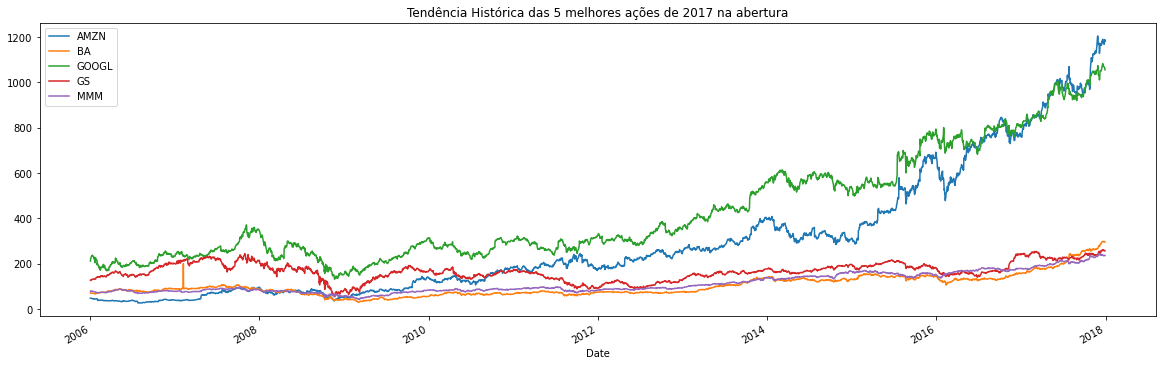

In [16]:
tdf[tdf.Name.isin(bs)].groupby('Name').Open.plot(title='Tendência Histórica das 5 melhores ações de 2017 na abertura',legend=True)